#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [115]:
#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [116]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [117]:
path = r"D:\Kì 6\Nhập môn học máy\Thực hành\Lab01\final_house_loan.csv" # Path to your file
df = read_dataset(path)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

<AxesSubplot:>

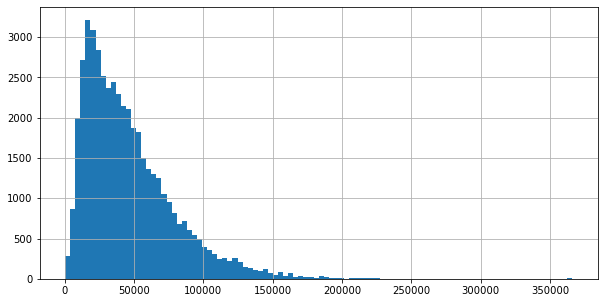

In [118]:
df["Loan Sanction Amount (USD)"].hist(bins=100, figsize=(10,5))

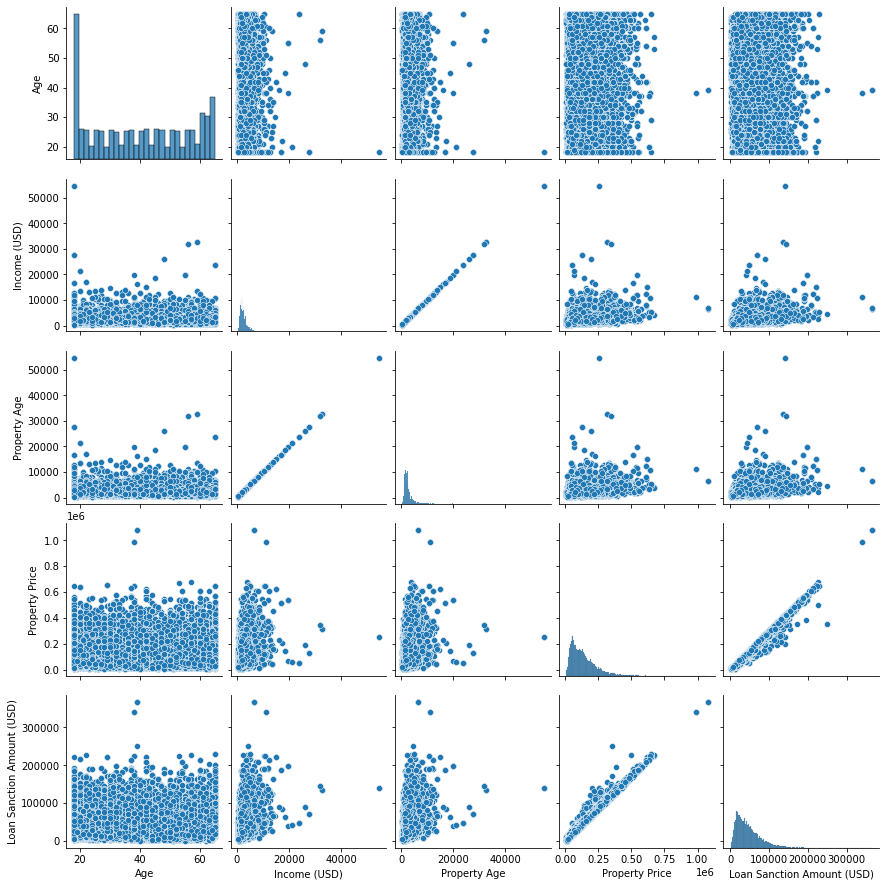

In [119]:
import seaborn as sns
sns.pairplot(df)

## Preprocessing

In [120]:
# check null values
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [121]:
def preprocessing_data(df):
    df.dropna(inplace=True)
    return df

In [122]:
df = preprocessing_data(df.copy())

In [123]:
df.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

## Feature Engineering

In [124]:
def normalize_data(df):
    normalized_data = df.copy()
    normalized_data["Gender"] = normalized_data["Gender"].astype("category").cat.codes
    normalized_data["Income Stability"] = normalized_data["Income Stability"].astype("category").cat.codes
    normalized_data["Property Location"] = normalized_data["Property Location"].astype("category").cat.codes
    
    display(normalized_data.head())
    display(normalized_data.corr())
    return normalized_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


<AxesSubplot:>

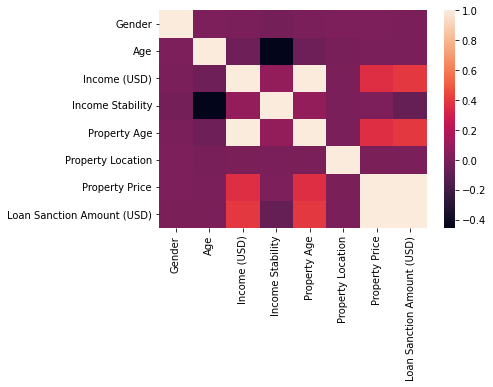

In [125]:
# Heatmap
import seaborn as sns
normalized_data = normalize_data(df.copy())
sns.heatmap(normalized_data.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [127]:
def prepare_X_y(df):
    columns = df.columns.tolist()
    columns.remove('Loan Sanction Amount (USD)')
    
    X = df[columns]
    y = df['Loan Sanction Amount (USD)']
    return X, y

X, y = prepare_X_y(normalized_data)

In [128]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [129]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

### Linear

In [130]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(trainX, trainY)

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
linear_error_train = mean_absolute_error(y_pred=pred, y_true=trainY)

pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
linear_error_test = mean_absolute_error(y_pred=pred, y_true=testY)

mean absolute error of linear model on train set  163.14116153139867
mean absolute error of linear model on test set  137.1045750673131


In [131]:
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

[-2.34483815e+02 -7.93861753e+01  5.50183711e-01 -1.11431363e+04
  4.74551612e-01 -6.02929137e+01  3.36339576e-01]

11896.351699425344


### Lasso

In [132]:
from sklearn.linear_model import Lasso
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

def build_lasso_model(X, y):
    model = Lasso(fit_intercept=True)
    model.fit(trainX, trainY)

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
lasso_error_train = mean_absolute_error(y_pred=pred, y_true=trainY)

pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
lasso_error_test = mean_absolute_error(y_pred=pred, y_true=testY)

mean absolute error of linear model on train set  163.82746511831536
mean absolute error of linear model on test set  137.7671559835852


In [133]:
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

[-2.30411413e+02 -7.92539710e+01  8.56088453e-01 -1.11270030e+04
  1.68487165e-01 -5.87931826e+01  3.36340395e-01]

11873.14564801415


### Ridge

In [134]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = Ridge(fit_intercept=True)
    model.fit(trainX, trainY)

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
ridge_error_train = mean_absolute_error(y_pred=pred, y_true=trainY)

pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
ridge_error_test = mean_absolute_error(y_pred=pred, y_true=testY)

mean absolute error of linear model on train set  163.2710490298505
mean absolute error of linear model on test set  137.22286291305434


In [135]:
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

[-2.34413176e+02 -7.93438667e+01  5.51497567e-01 -1.11378235e+04
  4.73173643e-01 -6.02824252e+01  3.36339895e-01]

11889.892895035446


### ElasticNet

In [136]:
from sklearn.linear_model import ElasticNet
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

def build_elastic_model(X, y):
    model = ElasticNet(fit_intercept=True)
    model.fit(trainX, trainY)

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
elastic_error_train = mean_absolute_error(y_pred=pred, y_true=trainY)

pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
elastic_error_test = mean_absolute_error(y_pred=pred, y_true=testY)

mean absolute error of linear model on train set  1747.907837029618
mean absolute error of linear model on test set  1741.8654661345083


In [137]:
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

[-5.12544859e+01 -6.45818816e-01  9.42776511e-01 -1.25268452e+03
 -3.74934647e-02 -2.56549075e+01  3.36931714e-01]

-166.83186339290114


### Compare Error

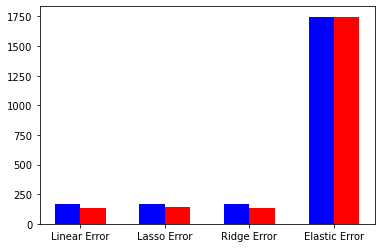

In [138]:
import matplotlib.pyplot as plt

index = np.arange(4)
h = ['Linear Error', 'Lasso Error', 'Ridge Error', 'Elastic Error']
error_train = np.array([linear_error_train, lasso_error_train, ridge_error_train, elastic_error_train])
error_test = np.array([linear_error_test, lasso_error_test, ridge_error_test, elastic_error_test])

plt.bar(index - 0.3, error_train, color='blue', width=0.3)
plt.bar(index, error_test, color='red', width=0.3)
plt.xticks(index-0.15, h)
plt.show()

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [139]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )
poly_error_train = mean_absolute_error(y_pred=poly_pred, y_true=trainY)

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))
poly_error_test = mean_absolute_error(y_pred=poly_pred, y_true=testY)

mean absolute error of linear model (with poly transform) on train set  159.7117429472204
mean absolute error of linear model (with poly transform) on test set  133.8526267735766


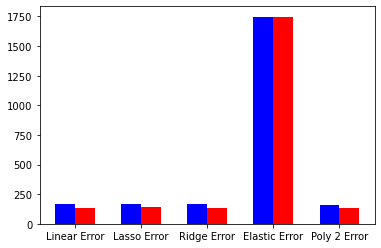

In [140]:
import matplotlib.pyplot as plt


h = ['Linear Error', 'Lasso Error', 'Ridge Error', 'Elastic Error', 'Poly 2 Error']
error_train = np.array([linear_error_train, lasso_error_train, ridge_error_train, elastic_error_train, poly_error_train])
error_test = np.array([linear_error_test, lasso_error_test, ridge_error_test, elastic_error_test, poly_error_test])

index = np.arange(5)
plt.bar(index - 0.3, error_train, color='blue', width=0.3)
plt.bar(index, error_test, color='red', width=0.3)
plt.xticks(index-0.15, h)
plt.show()

In [146]:
# Nếu ta chọn bậc n quá cao(n = 6), dẫn đến sai số lớn gây ra hiện tượng underfitting
poly_model = make_pipeline(PolynomialFeatures(6, include_bias=False), LinearRegression())
poly_model.fit(trainX, trainY)
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))
poly_error_test = mean_absolute_error(y_pred=poly_pred, y_true=testY)

mean absolute error of linear model (with poly transform) on train set  10240.685653822144
mean absolute error of linear model (with poly transform) on test set  11234.537986232932
